In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import gc
import pickle
import json

In [2]:
dtypes = {
        'app'           : 'uint16',
        'device'        : 'uint16',
        'os'            : 'uint16',
        'channel'       : 'uint16',
        'hour'          : 'uint8',
        'is_attributed' : 'uint8', 
        'ip_day_hour_count': 'uint32', 
        'ip_os_day_hour_count': 'uint32', 
        'ip_app_day_hour_count': 'uint32', 
        'ip_app_os_day_hour_count': 'uint32', 
        'app_day_hour_count': 'uint32', 
        'ip_device_os_count': 'uint32', 
        'ip_app_device_os_count': 'uint32', 
        'ip_device_os_mean': 'float16',
        'ip_app_device_os_mean': 'float16',
        'ip_app_device_mean': 'float16',
        'app_device_os_mean': 'float16',
        'ip_device_os_time2nextclick': 'int32',
        'ip_app_device_os_time2nextclick': 'int32',
        'ip_app_device_time2nextclick': 'int32',
        'ip_device_os_time2previousclick': 'int32',
        'ip_app_device_os_time2previousclick': 'int32',
        'ip_app_device_time2previousclick': 'int32',
        'ip_device_os_countfromfuture': 'uint32', 
        'ip_app_device_os_countfromfuture': 'uint32', 
        'ip_app_device_countfromfuture': 'uint32', 
        'ip_device_os_countfrompast': 'uint32', 
        'ip_app_device_os_countfrompast': 'uint32', 
        'ip_app_device_countfrompast': 'uint32', 
        'ip_device_os_lasttimediff': 'int32',
        'ip_app_device_os_lasttimediff': 'int32',
        'ip_app_device_lasttimediff': 'int32',
        'ip_device_os_firsttimediff': 'int32',
        'ip_app_device_os_firsttimediff': 'int32',
        'ip_app_device_firsttimediff': 'int32',
        'matrixFact_user_iposdeviceapp_item_app': 'float16',
        'matrixFact_user_ip_item_appdeviceos': 'float16',
        'matrixFact_user_ipchannel_item_appdeviceos': 'float16',
        'ip_device_os_regression': 'float16',
        'ip_app_device_os_regression': 'float16',
        'ip_app_device_regression': 'float16',
        'ip_app_device_os_channel_regression': 'float16', 
        'attributed_timediffmax':'int32',
        'attributed_timediffmin':'int32',
        'attributed_timediff':'float16',
        'matrixFact_user_ipappdeviceos_item_channel': 'float16'
    
        } 

In [3]:
model_path = '/home/kai/data/kaggle/talkingdata/wl/data/xgboost/'
model_name = 'all_suppelement_xgbtree_160_depth7_scale99_lr0.35_ff0.7'
model_postfix = '.pickle.dat'
feature_file = model_path + 'xgb-featurecolsV3_col38_scale99_lr0.35_ff0.7.json'
num_trees_load = [160]

In [4]:
modelfile=model_path + model_name + model_postfix
model_load = pickle.load(open(modelfile, "rb"))

print('load model done!')

# this may not need to be loaded in the future
# num_trees_load = np.load(model_path+prefix.format(1)+'.npy')

print('load number of trees done!')

load_path = '/home/kai/data/kaggle/talkingdata/wl/data/equalhour/'
file_format = '{}_features_supplementV3_feature42.csv'
test = pd.read_csv(load_path+file_format.format('test'),dtype=dtypes)
print('load test feature done!')


feature_col_load = json.load(open(feature_file))
print('load feature cols done!')

preds = []
submission_postfix = '_ntree'

for ntree in num_trees_load:
    ntree = int(ntree)
    preds.append(model_load.predict_proba(test[feature_col_load].values, ntree_limit=ntree)[:,1])
    print('predicting... {} done!'.format(ntree))
    submission_postfix += '_{}'.format(ntree)
pred = np.mean(preds, axis=0)


print('getting submission')
df_test_raw = pd.read_csv('/home/kai/data/kaggle/talkingdata/data/test.csv')
print('loading file done!')
df_sub = pd.DataFrame()
df_sub['click_id'] = df_test_raw['click_id']
df_sub['is_attributed'] = pred
print('predicting file done!')
submission_name = model_path+model_name+submission_postfix+'.csv.gz'
df_sub.to_csv(submission_name, compression='gzip', index=False)

    

load model done!
load number of trees done!
load test feature done!
load feature cols done!
predicting... 110 done!
predicting... 135 done!
predicting... 160 done!
getting submission
loading file done!
predicting file done!


In [5]:
a1 = pd.read_csv('/home/kai/data/kaggle/talkingdata/wl/data/xgboost/all_suppelement_xgbtree_160_depth7_scale99_lr0.35_ff0.7_ntree_140_150_160.csv.gz')

OSError: CRC check failed 0xf2e37137 != 0x2cd1723b

In [6]:
a2 = pd.read_csv('/home/kai/data/kaggle/talkingdata/wl/data/xgboost/all_suppelement_xgbtree_160_depth7_scale99_lr0.35_ff0.7_ntree_110_135_160.csv.gz')

In [10]:
import matplotlib.pyplot as plt

In [12]:
a = plt.hist(a2.is_attributed.iloc[:10000])

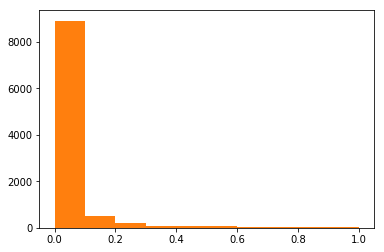

In [16]:
plt.show()

In [14]:
len(a[1])

11